# Lab Segmentation 1

In [11]:
from commonfunctions import *

%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


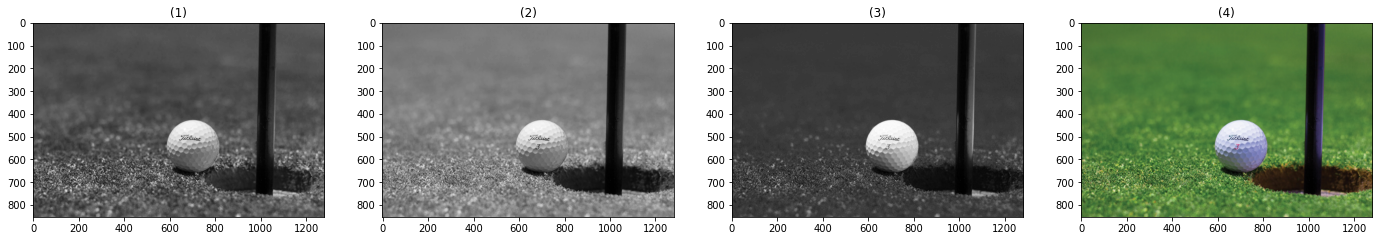

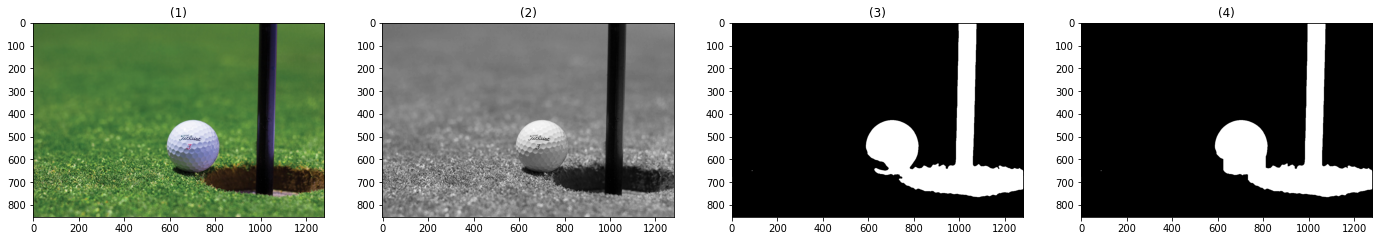

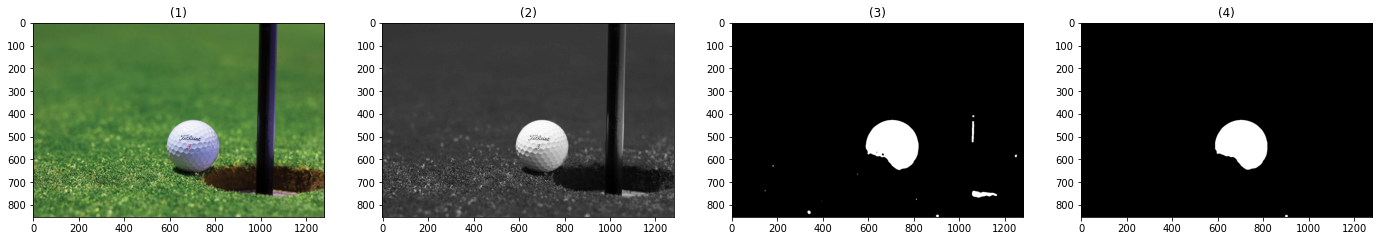

In [33]:
## For all requirements: The quality of the results is evaluated.


# 1- Read the image 
golf = io.imread("imgs/exp1/golf.jpeg")
# [VERY IMPORTANT] and convert it to float: image = image.astype(float)
golf = golf.astype(float)
# read image golf

# 2- Retreive the 3 channels of the image(R,G,B) (will be used in the coming steps)

R = golf[:,:,0]
G = golf[:,:,1]
B = golf[:,:,2]

# 3- Visually (not by code) detect the dominating color channel (C) for the background (R, G or B)

show_images([R,G,B,golf.astype(int)])

#2 Solutions: 1st Seperate Grass:

#Green is the most dominant, so we choose it for a good thresholding result

diff = 10

#G = median(G,square(14),mode='wrap')
# G = gaussian(G,sigma=2)

mask = (G - R > diff) & (G - B > diff)
falseMask = ~ mask
NewG = G.copy()

NewG[mask] = 0
NewG[falseMask] = 1
NewG = median(NewG,square(14),mode='wrap')

golf=golf.astype(int)
show_images([golf,G,NewG,closing(NewG, rectangle(50,3))])
#2 Solutions: 2nd Seperate ball only:


#Blue has most contrast, so we choose it for a good thresholding result

# 4- Draw the dominating channel (r, g or b) thresholded by some threshold (to make sure your choice is meaningful)

th = 100
mask = B>th
falseMask = B<=th
NewB = B.copy()

NewB[mask] = 1
NewB[falseMask] = 0
#show_images([B,NewB])


# 5- Get an intuitive way(There is a very simple way) to make a mask that can get the pixels where the values of the dominating channels 
# have larger values than the other channels with an appropriate threshold
B2 = B.copy()
B2 = median(B2,square(14),mode='wrap')

th2 = 110
mask2 = B2>th2
falseMask2 = B2<=th2
NewB2 = B2.copy()

NewB2[mask2] = 1
NewB2[falseMask2] = 0
NewB3 = closing(NewB2, disk(6))
NewB3 = opening(NewB3, rectangle(30,6))
NewB3 = opening(NewB3, rectangle(6,10))


# 6- display the binarized image

golf=golf.astype(int)
show_images([golf,B,NewB2,NewB3])





In [55]:
def check_green(img, color):
    mask = img.copy()
    mask[:][:] = color
    h_ = (img[:,:,0] - mask[:,:,0]) / (33/360)
    s_ = (img[:,:,1] - mask[:,:,1]) / (25/100)
    l_ = (img[:,:,2] - mask[:,:,2]) / (20/100)

    return (pow(h_, 4) + pow(s_, 4) + pow(l_, 4)) < 1


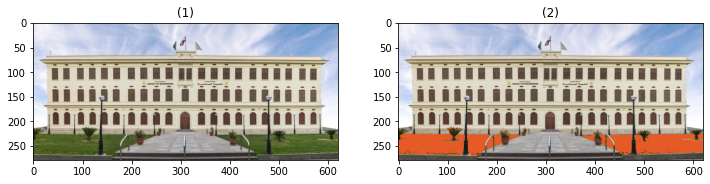

In [57]:
# ## 1- Get the required RGB color (Using a color picker)
# color = [87,112,47]

# # 2- Read image
# cufe = io.imread("imgs/exp2/cufe.png").astype(float)
# # 3- extract R, G and B channels (as float)
# R = cufe[:,:,0]
# G = cufe[:,:,1]
# B = cufe[:,:,2]

# # 4- calculate differences FOR EACH CHANNEL (between the image and the required pixel value)
# Rdiff = abs(R-color[0])
# Gdiff = abs(G-color[1])
# Bdiff = abs(B-color[2])

# # 5- calculate overall distance from the given RGB color, use any appropriate distance measure, take care of the minus distances
# newimg = Rdiff+Gdiff+Bdiff
# #show_images([Rdiff,Gdiff,Bdiff,newimg],titles = ["Red","Green","Blue",""])

# # 6-  create a mask by thresholding the differences
# mask = newimg <= 50

# # 7- In the input image, Replace the pixels of the mask with the following color
# # R = 230 , G = 90 , B=40
# cufe2 = cufe.copy()
# cufe2[mask] = [230,90,40]

# # 8- show the image or save it
# show_images([cufe2.astype(int)])

# 1- Get the required RGB color (Using a color picker)
color = [83/360,.58,.439]

# 2- Read image
cufe = io.imread("imgs/exp2/cufe.png")
cufe2 = cufe.copy()
cufe2 = rgb2hsv(cufe)

cufe2[check_green(cufe2,color)] = [16/360,.826,.902]

cufe2 = hsv2rgb(cufe2)

show_images([cufe, cufe2])
